# USL project part 2, 4 and 5

### Submitted by
Harsh Pundhir

## ----------------------------------------------------------------------------------------------------------------------------

## USL project part 2

### CONTEXT: 
- Company X curates and packages wine across various vineyards spread throughout the country.

### DATA DESCRIPTION: 
The data concerns the chemical composition of the wine and its respective quality.
Attribute Information: 
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]

### PROJECT OBJECTIVE: 
- Goal is to build a synthetic data generation model using the existing data provided by the company.

### Steps and tasks: 
1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

comp_data = pd.read_excel("Part2 - Company.xlsx")
comp_data

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [2]:
comp_data.shape

(61, 5)

In [3]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [4]:
comp_data.nunique()

A          54
B          53
C          50
D          54
Quality     2
dtype: int64

In [5]:
comp_data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

- Quality has **18** missing values

In [6]:
# function to impute values according to KNN as 3
def company_imputer(data):
    data_ = data.copy()
    data_['Quality'].replace({"Quality A":1,"Quality B":2},inplace=True)
    
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=3)
    data__ = pd.DataFrame(imputer.fit_transform(data_),columns = data.columns)    
    data__['Quality'].replace({1:"Quality A",2:"Quality B"},inplace=True)
    return data__

In [7]:
# Calling the function to impute the values

new_data = (company_imputer(comp_data))
print(new_data)

        A      B      C      D    Quality
0    47.0   27.0   45.0  108.0  Quality A
1   174.0  133.0  134.0  166.0  Quality B
2   159.0  163.0  135.0  131.0  Quality B
3    61.0   23.0    3.0   44.0  Quality A
4    59.0   60.0    9.0   68.0  Quality A
..    ...    ...    ...    ...        ...
56  200.0  186.0  185.0  179.0  Quality B
57  137.0  182.0  165.0  199.0  Quality B
58   88.0   39.0    9.0  102.0  Quality A
59  180.0  157.0  192.0  198.0  Quality B
60  157.0  135.0  135.0  156.0  Quality B

[61 rows x 5 columns]


### Conclusion:
- A function "company_imputer" was made 

#### Steps within the function
1.  "company_imputer" took the value as the dataset with missing values
2. It converted to "quality" attribute to numerical
3. Imputing was performed using KNN imputer with k = 3
4. the quality feature was then reset to categorical type

## ---------------------------------------------------------------------------------------------------------------------------------

# USL project part 4

### CONTEXT: 
- Company X is a sports management company for international cricket. 

### DATA DESCRIPTION: 
- The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

### PROJECT OBJECTIVE: 
- Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

### Steps and tasks: 
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. 
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [8]:
import seaborn as sns
sns.set_color_codes=True

In [9]:
sport = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
sport

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Lot of missing rows

In [10]:
sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


- Except name, everything else is numerical

In [11]:
sport.dropna(inplace=True)

In [12]:
sport.index = range(1,91)
sport

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
3,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
4,CL White,479.0,43.54,149.68,41.0,20.0,5.0
5,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
86,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
87,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
88,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
89,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


### Statistical Analysis

In [13]:
sport.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


- Runs is skewed in nature
- Ave almost follow normal distribution

In [14]:
temp = sport.drop(['Name'],axis=1)
lower_fence = temp.quantile(q=0.25) - (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5
top_fence = temp.quantile(q=0.75) + (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5

(temp[temp > top_fence]).count()

Runs     1
Ave      3
SR       0
Fours    3
Sixes    1
HF       2
dtype: int64

- Few outliers lie above the fence, maximum in Ave and Fours (3)

In [15]:
(temp[temp < lower_fence]).count()

Runs     0
Ave      0
SR       5
Fours    0
Sixes    0
HF       0
dtype: int64

- SR has 5 outliers below the fence

### Visualisation

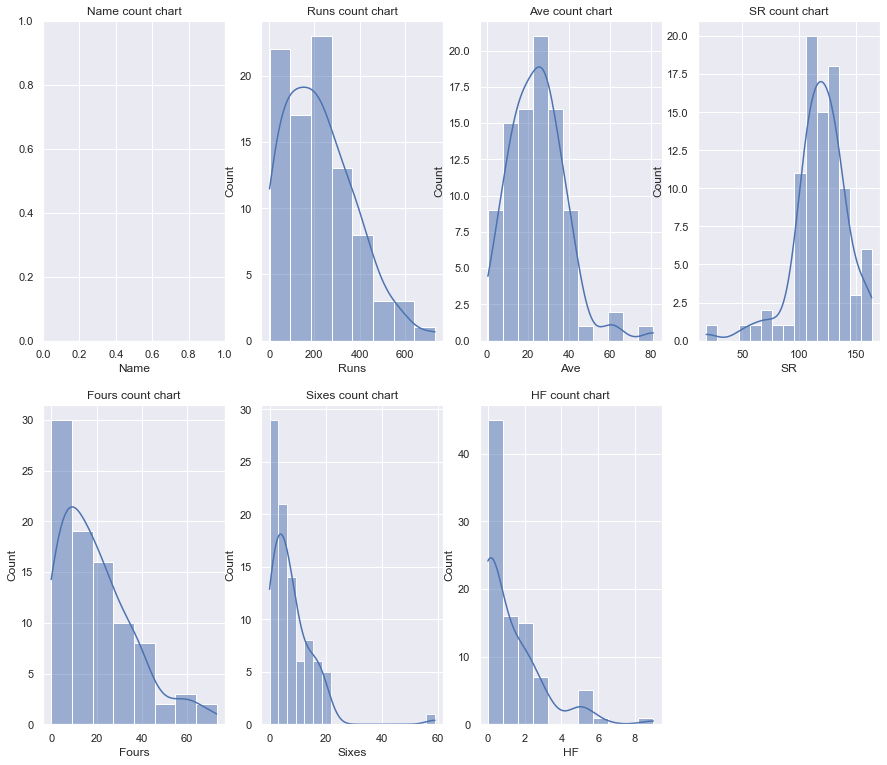

In [16]:
sns.set(color_codes = True)

a = 3  # number of rows
b = 4  # number of columns
c=1

fig = plt.figure(figsize=(15,20))

for i in sport.columns:
    
    plt.subplot(a, b, c)
    plt.title('{} count chart'.format(i))
    plt.xlabel(i)
    if(i!='Name'):
        sns.histplot(data=sport[i],kde=True);           
    c=c+1

- Fours, sixes and HF is left skewed
- SR is left skewed

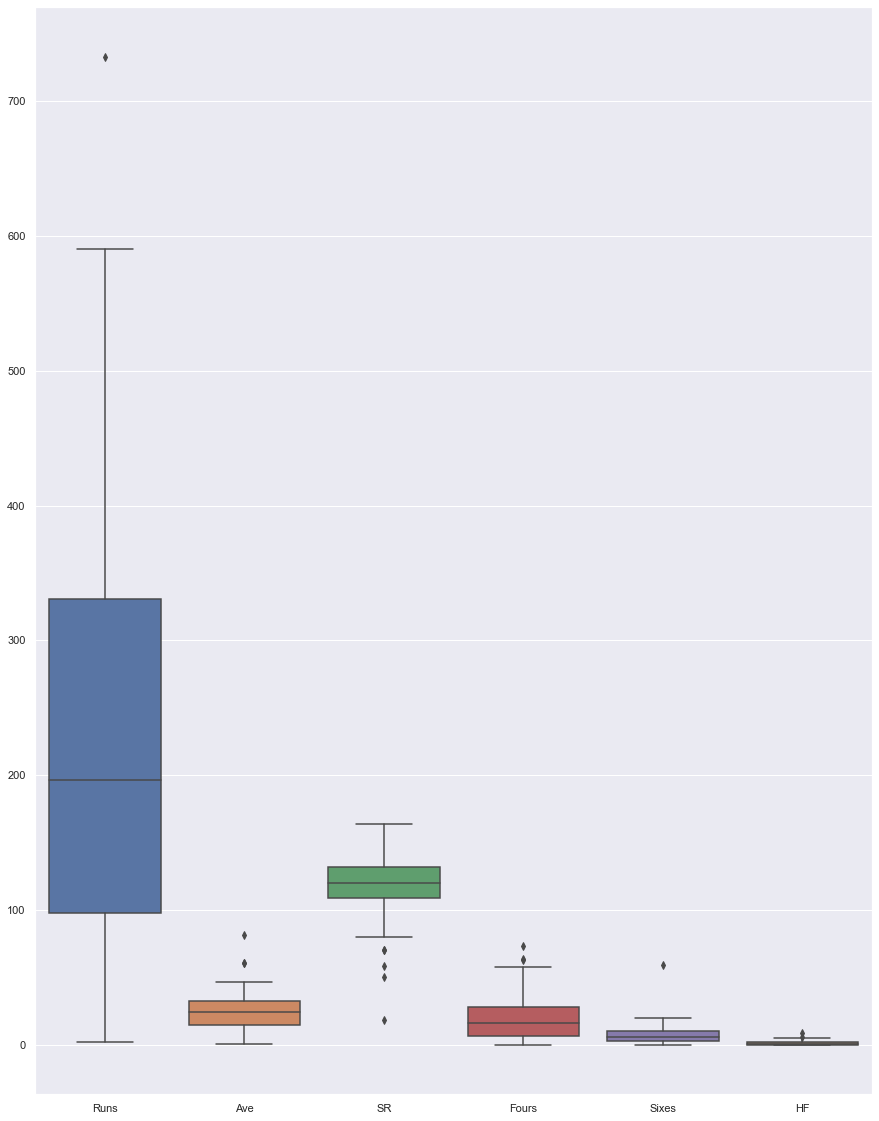

In [17]:
fig = plt.figure(figsize=(15,20))
sns.boxplot(data=sport);           


- The outliers as evaluated before can be visualised here

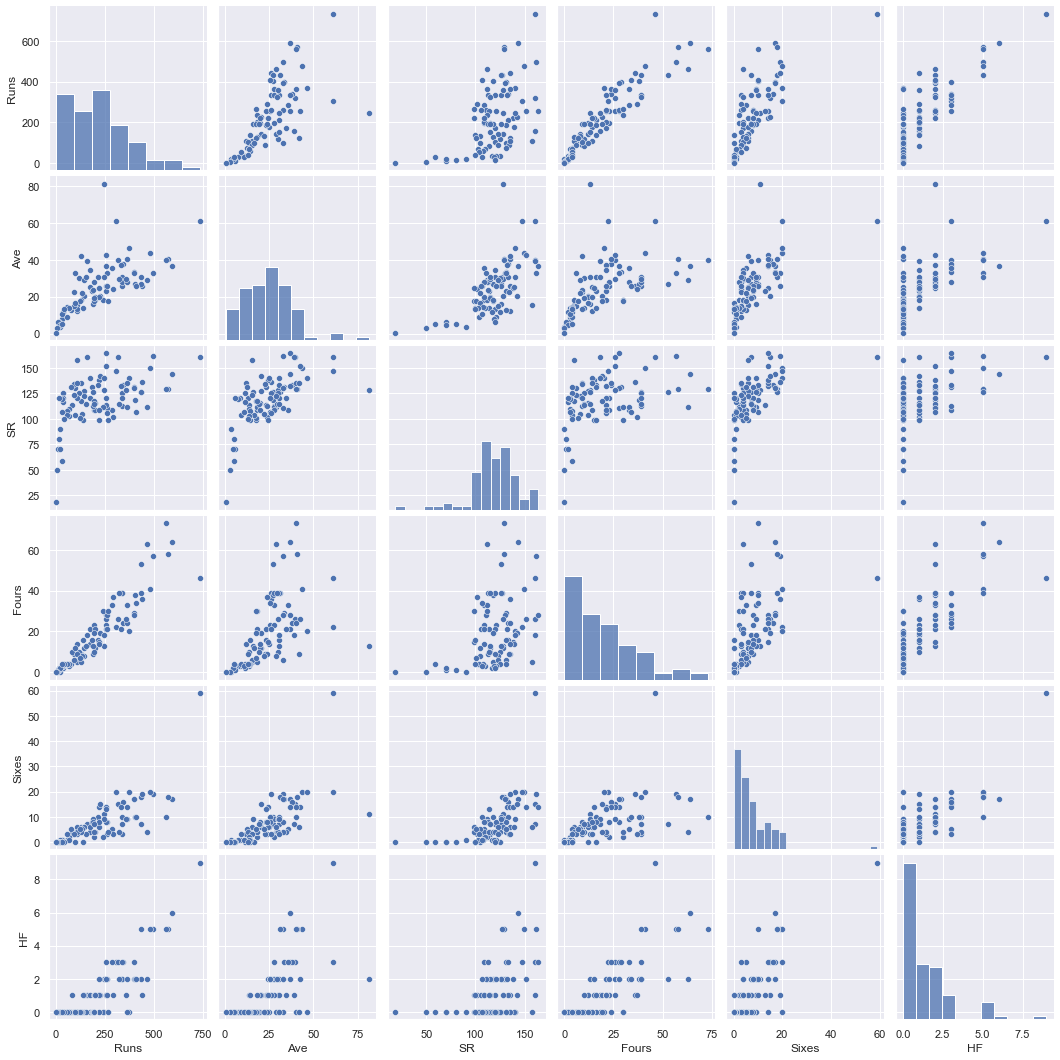

In [18]:
sns.pairplot(data=sport);

- Fours, sixes , ave and Runs are pairwise related to each other with high correlation

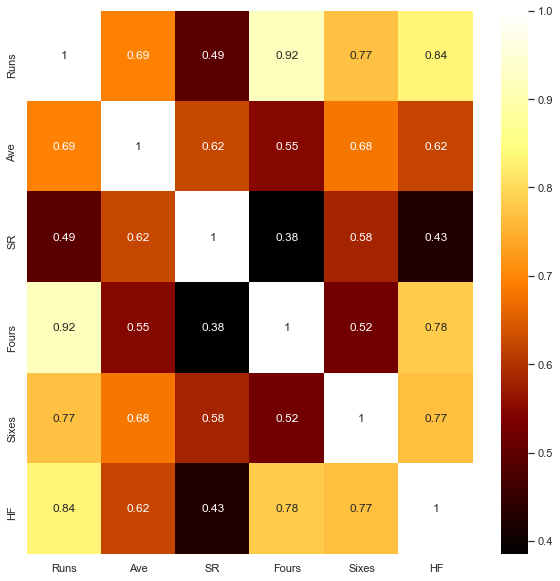

In [19]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data = sport.corr(),annot=True,cmap ='afmhot');

- Fours vs runs has the highest covariance
- SR vs fours has the least covariance

### Scaling for model development

In [20]:
from scipy.stats import zscore
sport_scaled = sport.drop('Name',axis=1).apply(zscore)
sport_scaled

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
2,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
3,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
4,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
5,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...
86,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
87,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
88,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989
89,-1.376812,-1.604470,-2.940057,-1.213411,-0.952365,-0.707989


### Ranking models based o PCA 

#### Why PCA?
1. It will remove highly correlated features ( for instance, fours vs runs here)
2. Because of this, the overfitting of the ranking model will go down, thereby enhancing the rankings.
3. The information from major features will be taken highly into consideration.
4. As PCA will build a linear model using the features, it is technically gathering more information rather than using a single or manually combined features.



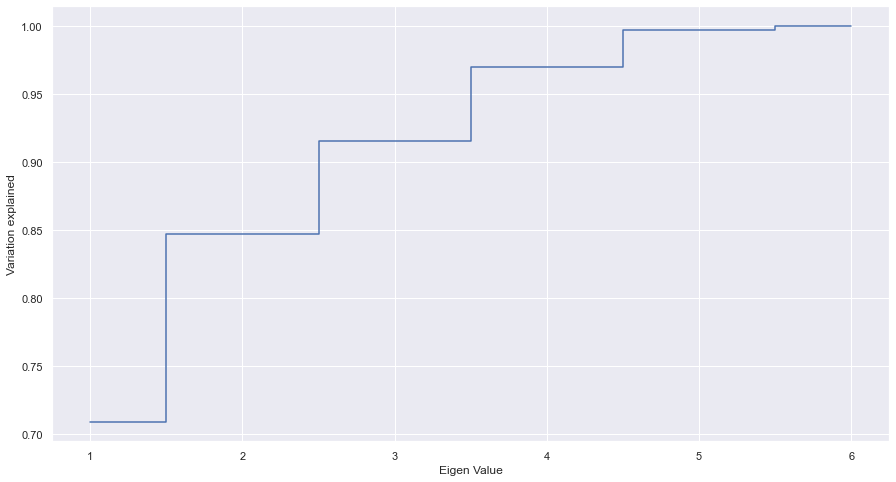

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(sport_scaled)

fig = plt.figure(figsize=(15,8))
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

 - 1st component explains ~ 70% of the variance
 - 4 can be chosen as the components (covers 95% of the variance)

In [31]:
pca4 = PCA(n_components=4)
pca4.fit(sport_scaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
data_pca = pd.DataFrame(pca4.transform(sport_scaled))
data_pca.index = sport['Name']
data_pca.sort_values(by=0,ascending=False)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]]
[0.70911996 0.13784566 0.06867133 0.05424458]


,0,1,2,3
Name,,,,
CH Gayle,8.516774,-0.354575,3.672474,-0.996267
G Gambhir,4.618340,1.476730,-0.503630,-0.594494
V Sehwag,4.142251,0.471438,-0.557204,-1.101184
S Dhawan,4.120072,1.401002,-0.116643,-0.014712
AM Rahane,4.024436,2.025082,-1.245706,0.170916
...,...,...,...,...
WD Parnell,-3.000751,1.049898,0.785502,0.052754
Z Khan,-3.006639,0.972067,0.818102,0.129328
PC Valthaty,-3.070959,1.463324,0.936508,0.276508


 - The above table shows that CH Gayle, G Gambhir and V Sehwag are the best performing players based on the first component of pca model
 
 - While PC Valthaty, RP Singh and Rohit Sharma (although I love his pull shots!) are at the bottom of the ranking list

###  Saving the rank sheet

In [33]:
data_pca.to_csv('Rank List IPL.csv')

In [34]:
loaded_sheet = pd.read_csv("Rank List IPL.csv")
loaded_sheet.head()

,Name,0,1,2,3
0,CH Gayle,8.516774,-0.354575,3.672474,-0.996267
1,G Gambhir,4.618340,1.476730,-0.503630,-0.594494
2,V Sehwag,4.142251,0.471438,-0.557204,-1.101184
3,CL White,3.899411,0.041816,0.262143,-0.228085
4,S Dhawan,4.120072,1.401002,-0.116643,-0.014712


In [23]:
sport.sort_values(by='Runs',ascending=False)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
6,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0
3,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
...,...,...,...,...,...,...,...
82,R Ashwin,18.0,6.00,120.00,2.0,0.0,0.0
85,A Mishra,16.0,5.33,80.00,1.0,0.0,0.0
86,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
89,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


- This shows Dhawan at position 3 according to run, but has lil lower ave, hence Dhawan did not come in top 3 of PCA results
- Sehwag came up under top 3 in pca dataset since he had very high SR, good indication for a match winning scenario

###  Conclusion

- Fours, sixes and HF was found to be left skewed. 
- SR was found to be left skewed as well.
- The ranking chart was made by using the first component of the PCA model ( as it takes important features into account)
- The rank table shows that CH Gayle, G Gambhir and V Sehwag are the best performing players based on the first component of pca model


## --------------------------------------------------------------------------------------------------------------------------------

# USL project part 5

## Questions
1. List down all possible dimensionality reduction techniques that can be implemented using python.
2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python

### Solution:


#### Possible techniques

##### 1. Elimination techniques without model utilisation

1. Eliminating features with **large magnitude of missing values**.
2. Removing features that possess very **low correlation** with the target variable
3. Performing statistical tests on the features to **test the hypothesis** of relation. And subsequently, features that fail to accept the hypothesis (p < 90 - 95%) can be taken out.
4. Stagnant columns (or **very low variance columns**) can be eliminated too, if such cases arise. 

##### 2. Elimination techniques with model utilisation

1. Feature importance can be obtained using **decision trees** and the features with low importance can be eliminated.
2. **Random forests** can be employed in a similar fashion as well.
3. Feature selection can be done by performing a model test by only feeding n-1 features (where n is the total number of features), then the features affecting the model result the least can be taken out.
4. **Principal component analysis** can be used to eliminate previous features based on newly formed features.




### Techniques on image/video or text reduction

- The implementation of few of the above methods detailed above can be utilised in dimensionality reduction for multimedia.
- PCA is a commonly practiced method to decrease dimension in images

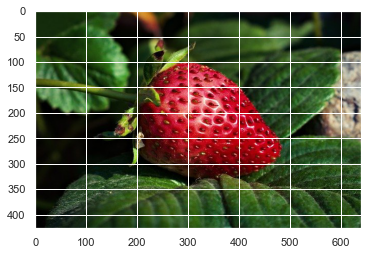

In [36]:
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

img = cv2.cvtColor(cv2.imread('strawberry.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [37]:
img.shape

(427, 640, 3)

- Image has 427 x 640 pixels (many many features in a way)
- 3 channels (RGB)

In [38]:
# splitting in channels

blue,green,red = cv2.split(img)

blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df


,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,18,18,19,20,20,20,20,20,19,19,...,9,10,9,9,11,11,11,12,11,10
1,18,19,19,19,20,20,20,20,19,19,...,9,10,9,9,11,11,11,12,11,10
2,19,19,19,19,19,19,20,20,19,19,...,9,10,9,9,11,11,11,12,11,10
3,19,19,19,19,19,19,19,19,20,19,...,9,10,9,9,11,11,10,11,10,9
4,19,19,18,18,18,18,19,19,20,20,...,9,10,9,9,11,11,10,11,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0,1,1,2,2,2,2,2,2,2,...,45,47,47,50,56,54,50,31,41,31
423,0,1,1,2,2,2,2,2,2,2,...,53,47,49,56,62,54,45,25,40,22
424,1,1,1,1,1,1,2,2,2,2,...,55,54,64,63,60,50,40,31,30,31
425,1,1,1,1,1,1,2,2,2,2,...,53,53,61,61,57,48,38,31,31,34


 - Scaling the features as it varies from 0 to 255 (RGB scale)

In [39]:
#scaling

df_blue = blue/255
df_green = green/255
df_red = red/255

In [40]:
# applying pca on each component

pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [41]:
# checking total variance explained

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9703542898114503
Green Channel: 0.9540283317546059
Red Channel  : 0.9213025120779783


- Almost 95% variance is explained by the new features

In [42]:
# reversing the transform

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

print(b_arr.shape, g_arr.shape, r_arr.shape)

(427, 640) (427, 640) (427, 640)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(427, 640, 3)


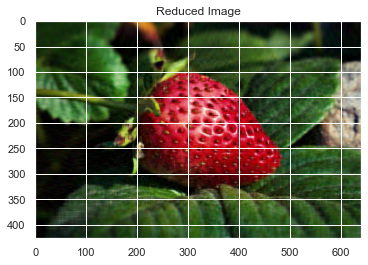

In [45]:
# new image

img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

- The image looks a little blurred, but still manages to capture most of the information

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


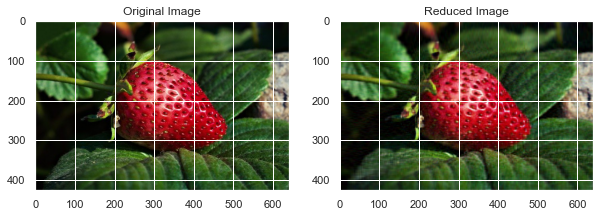

In [46]:
# comparing the two images

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()


### Conclusion

- The image size was decreased using pca
- The final image was little blur, but still captured most of the deatails quite graciously!

            ------------------------------------------------------- END -----------------------------------------------